<a href="https://colab.research.google.com/gist/daveluo/036ef7c3c73824c726c51ff04c71bf80/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## A quick intro to accessing Open Cities AI Challenge data STACs with pystac


In [ ]:
!apt-get install python3-rtree
!pip3 install pystac
!pip3 install geopandas
!pip3 install rasterio

In [2]:
import os
os.environ["CURL_CA_BUNDLE"] = "/etc/ssl/certs/ca-certificates.crt"

from matplotlib import pyplot as plt
import numpy as np
from pprint import pprint

import rasterio
from rasterio.windows import Window
import geopandas as gpd
from pyproj import CRS

from pystac import (Catalog, CatalogType, Item, Asset, LabelItem, Collection)

In [3]:
# overwriting STAC_IO read method to handle http/s as per https://pystac.readthedocs.io/en/latest/concepts.html#using-stac-io

from urllib.parse import urlparse
import requests
from pystac import STAC_IO

def my_read_method(uri):
    parsed = urlparse(uri)
    if parsed.scheme.startswith('http'):
        return requests.get(uri).text
    else:
        return STAC_IO.default_read_text_method(uri)

STAC_IO.read_text_method = my_read_method

## NOTE
I have used the local version of train1_cat.
I have used placed the downloaded train_tire_1 folder right outside our repository. We will use relative references to files and folders rather than using absolute paths which will be different on everyones' systems.

In [4]:
train1_cat = Catalog.from_file('../train_tier_1/catalog.json')

In [11]:
# load our training and test catalogs
#train1_cat = Catalog.from_file('https://drivendata-competition-building-segmentation.s3-us-west-1.amazonaws.com/train_tier_1/catalog.json')
#train2_cat = Catalog.from_file('https://drivendata-competition-building-segmentation.s3-us-west-1.amazonaws.com/train_tier_2/catalog.json')
#test_cat = Catalog.from_file('https://drivendata-competition-building-segmentation.s3-us-west-1.amazonaws.com/test/catalog.json')

In [5]:
# look at what's in train1_cat (aka train_tier_1)
train1_cat.describe()

* <Catalog id=train_tier_1>
    * <Collection id=acc>
      * <Item id=665946>
      * <LabelItem id=665946-labels>
      * <Item id=a42435>
      * <LabelItem id=a42435-labels>
      * <Item id=ca041a>
      * <LabelItem id=ca041a-labels>
      * <Item id=d41d81>
      * <LabelItem id=d41d81-labels>
    * <Collection id=mon>
      * <Item id=401175>
      * <LabelItem id=401175-labels>
      * <Item id=493701>
      * <LabelItem id=493701-labels>
      * <Item id=207cc7>
      * <LabelItem id=207cc7-labels>
      * <Item id=f15272>
      * <LabelItem id=f15272-labels>
    * <Collection id=ptn>
      * <Item id=abe1a3>
      * <LabelItem id=abe1a3-labels>
      * <Item id=f49f31>
      * <LabelItem id=f49f31-labels>
    * <Collection id=kam>
      * <Item id=4e7c7f>
      * <LabelItem id=4e7c7f-labels>
    * <Collection id=dar>
      * <Item id=a017f9>
      * <LabelItem id=a017f9-labels>
      * <Item id=b15fce>
      * <LabelItem id=b15fce-labels>
      * <Item id=353093>
      * <La

In [6]:
# make a dict of all collections witinin train1 catalog
 cols = {cols.id:cols for cols in train1_cat.get_children()}
 cols

{'acc': <Collection id=acc>,
 'mon': <Collection id=mon>,
 'ptn': <Collection id=ptn>,
 'kam': <Collection id=kam>,
 'dar': <Collection id=dar>,
 'znz': <Collection id=znz>,
 'nia': <Collection id=nia>}

In [7]:
# look at the acc collection, as a dict
cols['acc'].to_dict()

{'id': 'acc',
 'stac_version': '0.8.1',
 'description': 'Tier 1 training data from acc',
 'links': [{'rel': 'item',
   'href': './665946/665946.json',
   'type': 'application/json'},
  {'rel': 'item',
   'href': './665946-labels/665946-labels.json',
   'type': 'application/json'},
  {'rel': 'item', 'href': './a42435/a42435.json', 'type': 'application/json'},
  {'rel': 'item',
   'href': './a42435-labels/a42435-labels.json',
   'type': 'application/json'},
  {'rel': 'item', 'href': './ca041a/ca041a.json', 'type': 'application/json'},
  {'rel': 'item',
   'href': './ca041a-labels/ca041a-labels.json',
   'type': 'application/json'},
  {'rel': 'item', 'href': './d41d81/d41d81.json', 'type': 'application/json'},
  {'rel': 'item',
   'href': './d41d81-labels/d41d81-labels.json',
   'type': 'application/json'},
  {'rel': 'self',
   'href': '/home/jeetendra/Documents/Semester_2/ML/Project/train_tier_1/acc/collection.json',
   'type': 'application/json'},
  {'rel': 'root', 'href': '../catalog.j

In [8]:
# iterate through all the items within acc collection and print their ids
for i in cols['acc'].get_all_items():
  print(i.id)

665946
665946-labels
a42435
a42435-labels
ca041a
ca041a-labels
d41d81
d41d81-labels


665946 
----------------------------
{'area': 'acc', 'datetime': '2018-08-05 00:00:00Z', 'license': 'CC BY 4.0'}

_____________________________________
raster metadata starts here:
{'count': 4,
 'crs': CRS.from_epsg(32630),
 'driver': 'GTiff',
 'dtype': 'uint8',
 'height': 150147,
 'nodata': None,
 'transform': Affine(0.02001518707102818, 0.0, 805429.9166958937,
       0.0, -0.02001518707102818, 624939.1898949385),
 'width': 84466}
Raster metadata ends here

_____________________________________

----------------------------
665946-labels 
----------------------------
{'area': 'acc',
 'datetime': '2018-08-05 00:00:00Z',
 'label:description': 'Geojson building labels for scene 665946',
 'label:overviews': [{'counts': [{'count': 7308, 'name': 'yes'}],
                      'property_key': ['building']}],
 'label:properties': ['building'],
 'label:type': 'vector',
 'license': 'ODbL-1.0'}

_____________________________________
This is a label


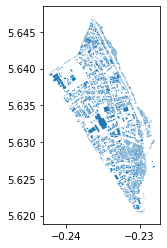

Label ends here

_____________________________________

----------------------------
a42435 
----------------------------
{'area': 'acc', 'datetime': '2018-10-06 00:00:00Z', 'license': 'CC BY 4.0'}

_____________________________________
raster metadata starts here:
{'count': 4,
 'crs': CRS.from_epsg(32630),
 'driver': 'GTiff',
 'dtype': 'uint8',
 'height': 39162,
 'nodata': None,
 'transform': Affine(0.032029411960186015, 0.0, 804676.2688712641,
       0.0, -0.03202926727370731, 621829.9693785439),
 'width': 57540}
Raster metadata ends here

_____________________________________

----------------------------
a42435-labels 
----------------------------
{'area': 'acc',
 'datetime': '2018-10-06 00:00:00Z',
 'label:description': 'Geojson building labels for scene a42435',
 'label:overviews': [{'counts': [{'count': 6647, 'name': 'yes'}],
                      'property_key': ['building']}],
 'label:properties': ['building'],
 'label:type': 'vector',
 'license': 'ODbL-1.0'}

________________

IndexError: too many indices for array

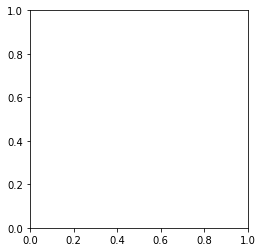

In [9]:
# for all items within acc col, either load and display label geojson with geopandas or raster metadata with rasterio

for i in cols['acc'].get_all_items():
  print(i.id,'\n----------------------------')
  pprint(i.properties)
  if 'label' in i.id:
    print("\n_____________________________________");
    print("This is a label")
    gdf = gpd.read_file(i.make_asset_hrefs_absolute().assets['labels'].href)
    gdf.plot()
    plt.show()
    print("Label ends here")
    print("\n_____________________________________")
  else: 
    print("\n_____________________________________")
    print('raster metadata starts here:')
    pprint(rasterio.open(i.make_asset_hrefs_absolute().assets['image'].href).meta)
    print("Raster metadata ends here")
    print("\n_____________________________________")
  print('\n----------------------------')

## Load one image scene and create one training chip (pair of image and label) with windowed reads

In [10]:
# open one image item
SCENE_ID = 'ca041a'

one_item = cols['acc'].get_item(id=SCENE_ID)
one_item.to_dict()

{'type': 'Feature',
 'stac_version': '0.8.1',
 'id': 'ca041a',
 'properties': {'area': 'acc',
  'license': 'CC BY 4.0',
  'datetime': '2018-11-12T00:00:00Z'},
 'geometry': {'coordinates': [[[-0.2260939759101167, 5.607821019807083],
    [-0.22707525357332697, 5.609567361411101],
    [-0.2257626190986551, 5.610742610987594],
    [-0.2209214783972656, 5.60396659440964],
    [-0.2209297943096631, 5.603475955578037],
    [-0.21938590601191368, 5.601711342600872],
    [-0.21863322644066166, 5.601370284670147],
    [-0.2171984310079642, 5.60126443910544],
    [-0.2150344772406196, 5.602172946869177],
    [-0.21221192884842804, 5.603687126475405],
    [-0.2071666235973881, 5.60628622311988],
    [-0.20581415249279408, 5.604666197948947],
    [-0.2074253572000044, 5.603584221065274],
    [-0.2083544460457665, 5.6019965375946645],
    [-0.20906008314381597, 5.600996885039098],
    [-0.21070656970592522, 5.599526807751497],
    [-0.2114122068039735, 5.597897962116837],
    [-0.212416616071534, 5.

In [31]:
self_path = ""
for link in one_item.links:
    if link.rel  == "self":
        self_path = os.path.dirname(link.target)
self_path

'/home/jeetendra/Documents/Semester_2/ML/Project/train_tier_1/acc/ca041a'

In [35]:
# load raster for this item
raster_path = os.path.join(self_path, one_item.assets['image'].href)
print(raster_path)
rst = rasterio.open(raster_path)
rst.meta

/home/jeetendra/Documents/Semester_2/ML/Project/train_tier_1/acc/ca041a/./ca041a.tif


{'driver': 'GTiff',
 'dtype': 'uint8',
 'nodata': None,
 'width': 65882,
 'height': 77778,
 'count': 4,
 'crs': CRS.from_epsg(32630),
 'transform': Affine(0.035820209694930036, 0.0, 807207.717115721,
        0.0, -0.035820613560994544, 620903.4357975163)}

In [36]:
# check raster resolution
rst.res

(0.035820209694930036, 0.035820613560994544)

In [59]:
win_sz = 1024

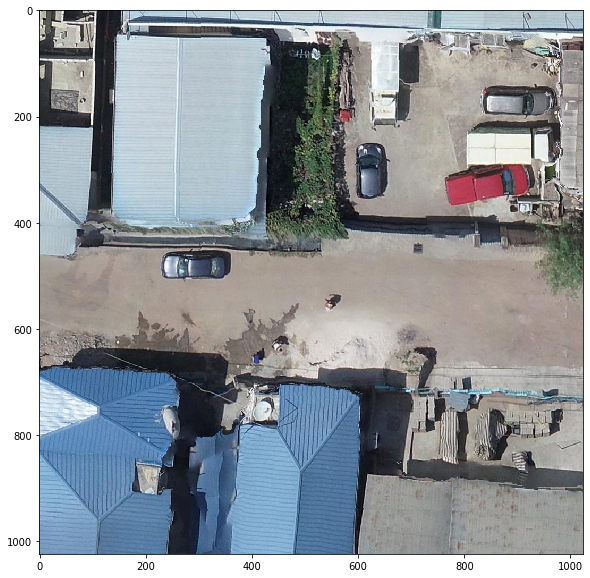

In [13]:
# make a windowed read of this raster and reshape into a displayable 4-d array (RGB+alpha channel)
# more on windowed reads with rasterio: https://rasterio.readthedocs.io/en/stable/topics/windowed-rw.html#windows



window = Window(rst.meta['width']//2,rst.meta['height']//2,win_sz,win_sz) # 1024x1024 window starting at center of raster
win_arr = rst.read(window=window)
win_arr = np.moveaxis(win_arr,0,2)
plt.figure(figsize=(10,10))
plt.imshow(win_arr)

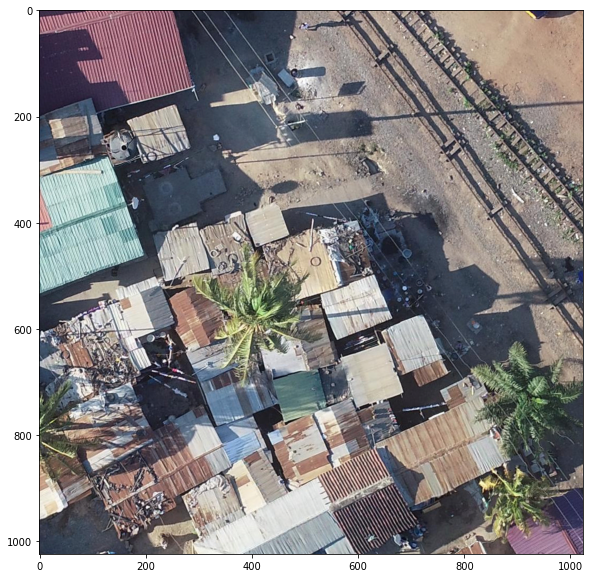

In [76]:
window = Window(3000,1024, win_sz,win_sz) # 1024x1024 window starting at center of raster
win_arr = rst.read(window=window)
win_arr = np.moveaxis(win_arr,0,2)
plt.figure(figsize=(10,10))
plt.imshow(win_arr)

In [77]:
# create a Polygon box to chip into training image and label 
from shapely.geometry import box
win_box = box(*rasterio.windows.bounds(window, rst.meta['transform']))

In [78]:
CRS.from_epsg(4326)

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [79]:
rst.meta['crs']

CRS.from_epsg(32630)

epsg:4326


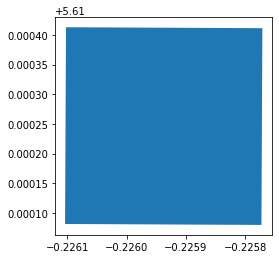

In [80]:
# make box into geodataframe for reprojection and later intersect operation
win_box_gdf = gpd.GeoDataFrame(geometry=[win_box], crs=rst.meta['crs'])
win_box_gdf = win_box_gdf.to_crs(CRS.from_epsg(4326))
print(win_box_gdf.crs)
win_box_gdf.plot()

In [81]:
one_item_label = cols['acc'].get_item(id=SCENE_ID+'-labels')
one_item_label.to_dict()

{'type': 'Feature',
 'stac_version': '0.8.1',
 'id': 'ca041a-labels',
 'properties': {'label:description': 'Geojson building labels for scene ca041a',
  'area': 'acc',
  'label:type': 'vector',
  'label:properties': ['building'],
  'label:overviews': [{'property_key': ['building'],
    'counts': [{'name': 'yes', 'count': 10194}]}],
  'license': 'ODbL-1.0',
  'datetime': '2018-11-12T00:00:00Z'},
 'geometry': {'coordinates': [[[-0.2260939759101167, 5.607821019807083],
    [-0.22707525357332697, 5.609567361411101],
    [-0.2257626190986551, 5.610742610987594],
    [-0.2209214783972656, 5.60396659440964],
    [-0.2209297943096631, 5.603475955578037],
    [-0.21938590601191368, 5.601711342600872],
    [-0.21863322644066166, 5.601370284670147],
    [-0.2171984310079642, 5.60126443910544],
    [-0.2150344772406196, 5.602172946869177],
    [-0.21221192884842804, 5.603687126475405],
    [-0.2071666235973881, 5.60628622311988],
    [-0.20581415249279408, 5.604666197948947],
    [-0.2074253572000

In [82]:
label_self_path = ""
for link in one_item_label.links:
    if link.rel  == "self":
        label_self_path = os.path.dirname(link.target)
label_self_path

'/home/jeetendra/Documents/Semester_2/ML/Project/train_tier_1/acc/ca041a-labels'

In [83]:
label_path = os.path.join(label_self_path, one_item_label.assets['labels'].href)
scene_labels_gdf = gpd.read_file(label_path)
scene_labels_gdf

building                  scene_id scene_area  name amenity religion  \
0          yes  5be9bb18080ac000051474fe        acc  None    None     None   
1          yes  5be9bb18080ac000051474fe        acc  None    None     None   
2          yes  5be9bb18080ac000051474fe        acc  None    None     None   
3          yes  5be9bb18080ac000051474fe        acc  None    None     None   
4          yes  5be9bb18080ac000051474fe        acc  None    None     None   
...        ...                       ...        ...   ...     ...      ...   
10189      yes  5be9bb18080ac000051474fe        acc  None    None     None   
10190      yes  5be9bb18080ac000051474fe        acc  None    None     None   
10191      yes  5be9bb18080ac000051474fe        acc  None    None     None   
10192      yes  5be9bb18080ac000051474fe        acc  None    None     None   
10193      yes  5be9bb18080ac000051474fe        acc  None    None     None   

      building:levels denomination building:material leisure  ... access  \
0                None         None              None    None  ...   None   
1                None         None              None    None  ...   None   
2                None         None              None    None  ...   None   
3                None         None              None    None  ...   None   
4                None         None              None    None  ...   None   
...               ...          ...               ...     ...  ...    ...   
10189            None         None              None    None  ...   None   
10190            None         None              None    None  ...   None   
10191            None         None              None    None  ...   None   
10192            None         None              None    None  ...   None   
10193            None         None              None    None  ...   None   

      generator:source power internet_access internet_access:fee operator  \
0                 None  None            None                None     None   
1                 None  None            None                None     None   
2                 None  None            None                None     None   
3                 None  None            None                None     None   
4                 None  None            None                None     None   
...                ...   ...             ...                 ...      ...   
10189             None  None            None                None     None   
10190             None  None            None                None     None   
10191             None  None            None                None     None   
10192             None  None            None                None     None   
10193             None  None            None                None     None   

      rooms addr:housenumber    id  \
0      None             None  None   
1      None             None  None   
2      None             None  None   
3      None             None  None   
4      None             None  None   
...     ...              ...   ...   
10189  None             None  None   
10190  None             None  None   
10191  None             None  None   
10192  None             None  None   
10193  None             None  None   

                                                geometry  
0      POLYGON ((-0.21303 5.60046, -0.21280 5.60049, ...  
1      POLYGON ((-0.21347 5.60081, -0.21347 5.60072, ...  
2      POLYGON ((-0.21407 5.60034, -0.21393 5.60035, ...  
3      POLYGON ((-0.21345 5.60034, -0.21332 5.60035, ...  
4      POLYGON ((-0.21323 5.60056, -0.21309 5.60058, ...  
...                                                  ...  
10189  POLYGON ((-0.21565 5.60164, -0.21561 5.60166, ...  
10190  POLYGON ((-0.21452 5.60059, -0.21438 5.60060, ...  
10191  POLYGON ((-0.21737 5.59970, -0.21720 5.59971, ...  
10192  POLYGON ((-0.21334 5.59580, -0.21336 5.59572, ...  
10193  POLYGON ((-0.21090 5.60401, -0.21089 5.60399, ...  

[10194 rows x 32 columns]

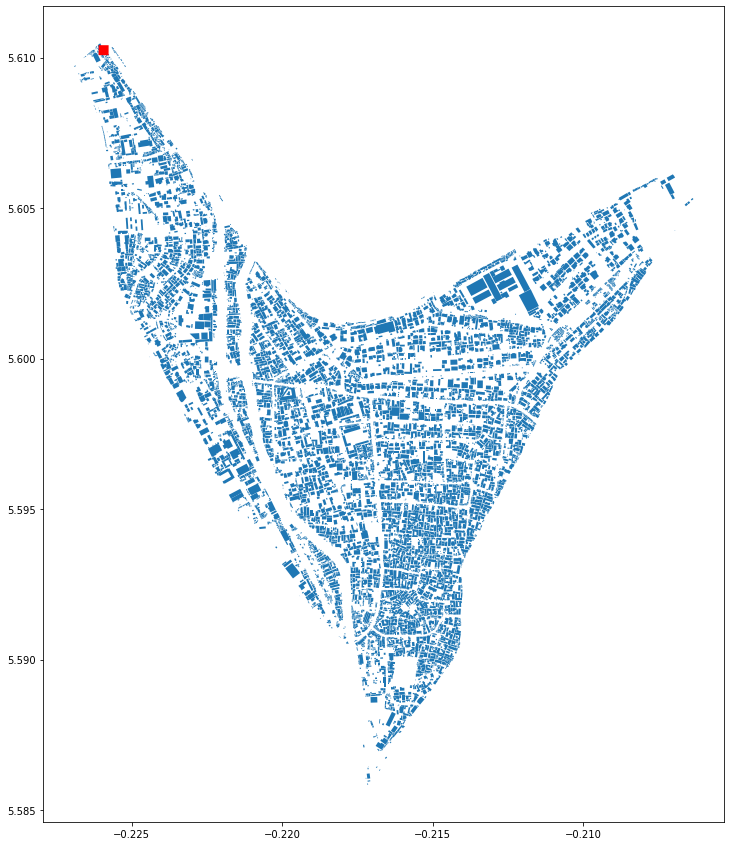

In [84]:
# plot both gdf to visualize where win_box is within the whole image scene
fig, ax = plt.subplots(1,1,figsize=(15,15))
scene_labels_gdf.plot(ax=ax)
win_box_gdf.plot(ax=ax, color='red')

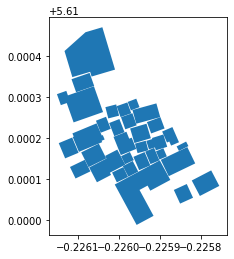

In [85]:
# get the label geoms that intersect with our win_box
gdf_chip = gpd.sjoin(scene_labels_gdf, win_box_gdf, how='inner', op='intersects')
gdf_chip.plot()

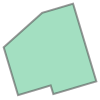

In [86]:
# create a list of (geom, burn_val) to pass into rasterio's rasterize function, see: https://rasterio.readthedocs.io/en/latest/api/rasterio.features.html#rasterio.features.rasterize
burn_val = 255
shapes = [(geom, burn_val) for geom in gdf_chip.geometry]
shapes[0][0]

In [87]:
# get the affine transform object for our win_box to pass into rasterize()
print(win_box_gdf.bounds.values[0])
chip_tfm = rasterio.transform.from_bounds(*win_box_gdf.bounds.values[0], win_sz, win_sz)
print(chip_tfm)

[-0.22610361  5.61007977 -0.22577122  5.61041278]
| 0.00, 0.00,-0.23|
| 0.00,-0.00, 5.61|
| 0.00, 0.00, 1.00|


In [88]:
from rasterio.features import rasterize

label_arr = rasterize(shapes, (win_sz, win_sz), transform=chip_tfm, dtype='uint8')

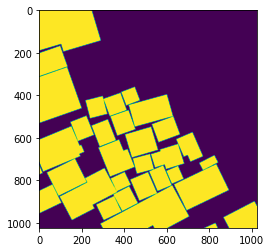

In [89]:
plt.imshow(label_arr)

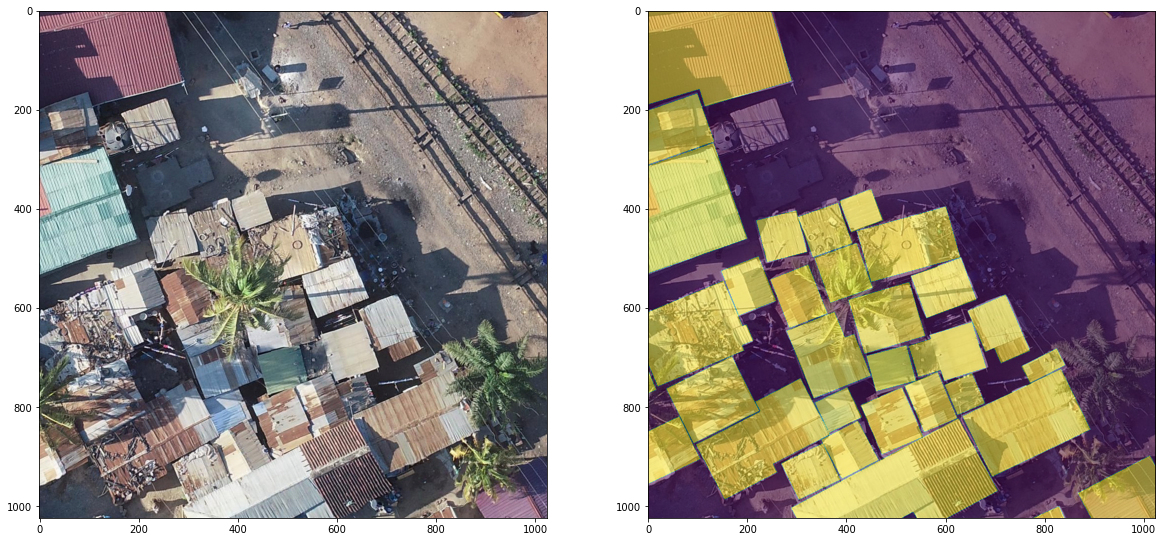

In [90]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,10))
ax1.imshow(win_arr)
ax2.imshow(win_arr)
ax2.imshow(label_arr, alpha=0.5)

## That's all! 

For more info, check out: 
- [Challenge webpage on working with STACs](https://www.drivendata.org/competitions/60/building-segmentation-disaster-resilience/page/154/)
- [pystac documentation](https://pystac.readthedocs.io/en/latest/index.html)

## Bonus material on saving chipped images and labels as geotiffs

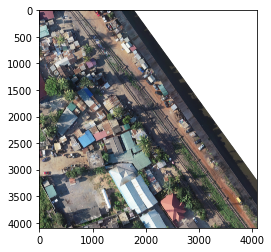

In [64]:
plt.imshow(win_arr)

In [65]:
chip_tfm

Affine(1.2983791166278752e-06, 0.0, -0.22610830897152462,
       0.0, -1.300800728163548e-06, 5.610412779496326)

In [91]:
def save_geochip(arr, chip_tfm, save_fn='test', crs='EPSG:4326', dtype='uint8'):
    im = (arr).astype(dtype)

    # check im shape, number of channels and expand into (H,W,C) if needed
    if len(im.shape) == 3: num_ch = im.shape[-1]
    else: 
      num_ch = 1
      im = np.expand_dims(im, -1)

    with rasterio.open(f'{save_fn}.tif', 'w', driver='GTiff', 
                            height=im.shape[0], width=im.shape[1],
                            count=num_ch, dtype=im.dtype, crs=crs, transform=chip_tfm, compress='LZW') as dst: #TODO: look into issue using pyproj CRS object here
        
        for ch in range(num_ch):
          dst.write(im[:,:,ch], indexes=ch+1) #indexes start at 1

In [92]:
save_geochip(win_arr, chip_tfm)
save_geochip(label_arr, chip_tfm, 'label')

Check in QGIS that our saved chips are properly georeferenced against OSM baselayer:

<img src="https://www.dropbox.com/s/56mbhsq8oud0jet/georef_imagechip.png?dl=1" alt="image chip"
	 width="400" height="400" />
<img src="https://www.dropbox.com/s/28glv9i0jek2227/georef_labelchip.png?dl=1" alt="label chip"
	 width="400" height="400" />

Looks good!

### Learn more about saving rasters with Rasterio:

https://rasterio.readthedocs.io/en/latest/quickstart.html#saving-raster-data

https://rasterio.readthedocs.io/en/latest/topics/windowed-rw.html#writing


## Bonus materials on using affine transform to convert between geo and display coordinates

In [94]:
# affine transform matrix for the 1024x1024 chip created above is used to convert from display to geo coords
chip_tfm

Affine(3.2459505470871955e-07, 0.0, -0.22610360848677868,
       0.0, -3.2520017596675277e-07, 5.610412779496326)

In [95]:
# the inverse affine tfm converts from geo coords to display
~chip_tfm

Affine(3080761.661317871, 0.0, 696571.3285116937,
       0.0, -3075029.086399499, 17252182.48365866)

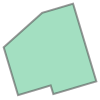

In [96]:
# grab a sample geometry from within the chip area
sample_geom = shapes[0][0]
sample_geom

In [97]:
# get geo coords of the exterior vertices of this geometry
xs,ys = sample_geom.exterior.coords.xy
xs,ys

(array('d', [-0.2260402, -0.2260093, -0.2260664, -0.2260699, -0.2261133, -0.226132363082164, -0.226081233254973, -0.2260402]),
 array('d', [5.6104695, 5.6103663, 5.6103494, 5.6103609, 5.610348, 5.610411566714463, 5.610457345022692, 5.6104695]))

In [98]:
# use the inverse affine tfm to convert our geo coords to display x,y values in 2 respective lists
display_xs = []
display_ys = []
for x,y in zip(xs,ys):
  display_coord = ~chip_tfm * (x,y)
  display_xs.append(display_coord[0])
  display_ys.append(display_coord[1])
display_xs, display_ys

([195.34643506992143,
  290.5419704046799,
  114.63047954335343,
  103.84781372884754,
  -29.85724237235263,
  -88.58605504978914,
  68.9327563099796,
  195.34643506992143],
 [-174.41719859093428,
  142.92580312490463,
  194.8937946856022,
  159.53096019104123,
  199.19883540272713,
  3.7293395027518272,
  -137.04028982669115,
  -174.41719859093428])

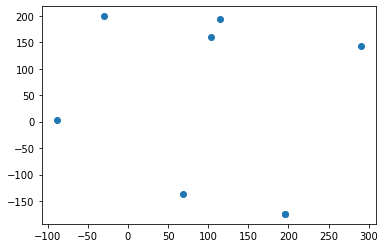

In [99]:
# scatter plot to check
# axes start from bottom left and display coords can be negative values (meaning it's outside the visible area in the chip)
plt.scatter(display_xs, display_ys)

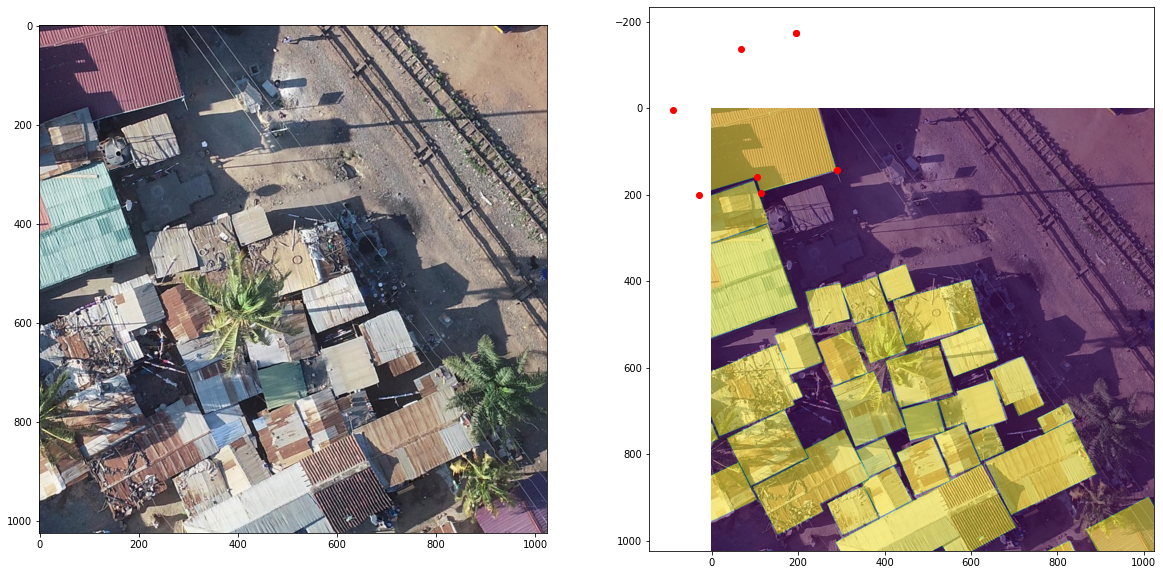

In [101]:
# plot on top of our earlier image and label chips to doublecheck in a more obvious way
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,10))
ax1.imshow(win_arr)
ax2.imshow(win_arr)
ax2.scatter(display_xs, display_ys, color='red')
ax2.imshow(label_arr, alpha=0.5)

### Learn more about affine transforms:

https://rasterio.readthedocs.io/en/latest/quickstart.html#dataset-georeferencing

https://shapely.readthedocs.io/en/latest/manual.html#affine-transformations


